In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

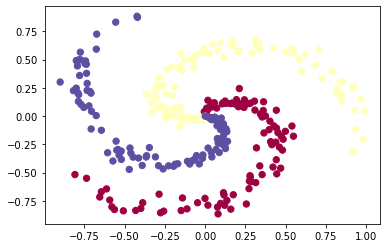

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [3]:
X.shape,y.shape

((300, 2), (300,))

## two layer network(hidden layer size:100)

1. loss function: CE
2. w1:(2,100)  w2:(100,3)
3. b1:(100,)   b2:(3,)
4. param init
5. prevent overfit: L2

In [4]:
W1=np.random.randn(2,100)*0.01
W2=np.random.randn(100,3)*0.01
b1=np.zeros((100))
b2=np.zeros((3))

In [5]:
##hyperparam
lambda_=1e-3
learning_rate=1e-2

In [6]:
## feed forward

# linear map 1
out1=X@W1+b1
# relu
out1_relu=out1.copy()
filt=out1_relu<0
out1_relu[filt]=0

# linear map 2
out2=out1_relu@W2+b2

## CE
exp_y=np.exp(out2)
prob=exp_y/np.sum(exp_y,axis=1,keepdims=1)
loss=-np.log(np.sum(prob[np.arange(len(y)),y])/len(y))+0.5*lambda_*(np.sum(W1**2)+np.sum(W2**2))

In [7]:
loss

1.098683508697988

In [8]:
## backpropagation

# CE part
dout2=prob.copy()
dout2[np.arange(len(y)),y]-=1

# layer2
dW2=out1_relu.T@dout2+lambda_*W2
db2=np.sum(dout2,axis=0)
dout1_relu=dout2@W2.T


# layer1

# relu part
dout1=dout1_relu.copy()
filt=out1<0
dout1[filt]=0

# linear part
dW1=X.T@dout1+lambda_*W1
db1=np.sum(dout1,axis=0)


In [9]:
## update parameter
W1-=learning_rate*dW1
b1-=learning_rate*db1
W2-=learning_rate*dW2
b2-=learning_rate*db2

In [20]:
## training
epoch=1000
for i in range(epoch):
    ## feed forward

    # linear map 1
    out1=X@W1+b1
    # relu
    out1_relu=out1.copy()
    filt=out1_relu<0
    out1_relu[filt]=0

    # linear map 2
    out2=out1_relu@W2+b2

    ## CE
    exp_y=np.exp(out2)
    prob=exp_y/np.sum(exp_y,axis=1,keepdims=1)
    loss=-np.log(np.sum(prob[np.arange(len(y)),y])/len(y))+0.5*lambda_*(np.sum(W1**2)+np.sum(W2**2))
    
    ##cal acc
    pred=np.argmax(prob,axis=1)
    acc=np.sum(pred==y)/len(y)

    
    print(f"epoch {i+1} ; loss  {loss}  ; acc  {acc}")

    ## backpropagation

    # CE part
    dout2=prob.copy()
    dout2[np.arange(len(y)),y]-=1

    # layer2
    dW2=out1_relu.T@dout2+lambda_*W2
    db2=np.sum(dout2,axis=0)
    dout1_relu=dout2@W2.T


    # layer1

    # relu part
    dout1=dout1_relu.copy()
    filt=out1<0
    dout1[filt]=0

    # linear part
    dW1=X.T@dout1+lambda_*W1
    db1=np.sum(dout1,axis=0)


    ## update parameter
    W1-=learning_rate*dW1
    b1-=learning_rate*db1
    W2-=learning_rate*dW2
    b2-=learning_rate*db2
    

epoch 1 ; loss  0.35162720795025504  ; acc  0.9833333333333333
epoch 2 ; loss  0.3517832937097656  ; acc  0.9766666666666667
epoch 3 ; loss  0.35355069634860914  ; acc  0.9833333333333333
epoch 4 ; loss  0.3535520837881331  ; acc  0.9733333333333334
epoch 5 ; loss  0.3558097060045876  ; acc  0.98
epoch 6 ; loss  0.3556054779343272  ; acc  0.9733333333333334
epoch 7 ; loss  0.3581858402198815  ; acc  0.98
epoch 8 ; loss  0.3576331223004675  ; acc  0.97
epoch 9 ; loss  0.36002664429513953  ; acc  0.9766666666666667
epoch 10 ; loss  0.3591879334324518  ; acc  0.97
epoch 11 ; loss  0.36103849728890747  ; acc  0.97
epoch 12 ; loss  0.3595889891830015  ; acc  0.9733333333333334
epoch 13 ; loss  0.360379213747795  ; acc  0.9733333333333334
epoch 14 ; loss  0.35886726605276487  ; acc  0.9733333333333334
epoch 15 ; loss  0.3589753803468344  ; acc  0.9766666666666667
epoch 16 ; loss  0.357850259546855  ; acc  0.9766666666666667
epoch 17 ; loss  0.3575493756295585  ; acc  0.9766666666666667
epoch

(-1.8650260179500675, 1.8749739820499358)

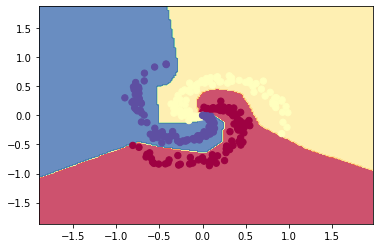

In [21]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())